# Smartphonepreis-predictor


<div style="background-color:#e6c1ff">
<h2>Data Import</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import pickle

In [2]:
df = pd.read_csv('smartphone prices.csv')
df.head()

,brand_name,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price(€)
0,SAMSUNG,Samsung S24 Ultra,"6.8"" (120Hz)",40MP,108MP + 10MP + 10MP + 12MP,Exynos,5000 mAh,8.0,128,1810.81
1,SAMSUNG,Samsung S24 Plus,"6.6"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,4500 mAh,8.0,128,1027.02
2,SAMSUNG,Samsung Zero,"6.41"" (120Hz)",32 MP,12 MP + 8 MP + 12 MP,Snapdragon 888 5G,4500 mAh,8.0,256,610.81
3,SAMSUNG,Samsung S24,"6.1"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,3700 mAh,8.0,128,1351.35
4,SAMSUNG,Samsung A05s,"6.5"" (90Hz)",5MP,50MP + 2MP + 2MP,Exynos,5000 mAh,4.0,64,135.13


In [3]:
df.rename(columns={'brand_name':'brand', 'price(€)':'price'}, inplace=True)

In [4]:
df.shape

(1256, 10)

<div style="background-color:#e6c1ff">
<h2>Data Wrangling</h2>
</div>

Um Model und Visualisierungen auf kontinuiertliche Variable problemlos durchzuführen muss man numerische Werte haben

In [5]:
#Fehlende Werte (NaN values)
df.isna().sum()

brand               0
model               0
display             0
front_camera        0
rare_camera         0
processor           9
battery_capacity    0
ram                 0
internal_storage    0
price               0
dtype: int64

In [6]:
# hier sind nur 9 werte in der spalte processor fehlend dann werden wir sie einfach wegmachen 
df.dropna(inplace=True)

In [7]:
df.shape

(1247, 10)

In [8]:
#sich wiederholende Zeilen zeigen
df.duplicated().sum()

2

In [9]:
# sich wiederholendeZeilen entfernen
df.drop_duplicates(inplace=True)

In [10]:
# Null Werte
df.isnull().sum()

brand               0
model               0
display             0
front_camera        0
rare_camera         0
processor           0
battery_capacity    0
ram                 0
internal_storage    0
price               0
dtype: int64

Nachdem die Methode "drop" verwendet wurde, muss der Index immer zurückgesetzt werden. Dies ist besonders wichtig, wenn Schleifen über Zeilen verwendet werden.

In [11]:
df.reset_index(drop=True, inplace=True) # drop = true um den ehemaligen Index zu entfernen

In [12]:
df.dtypes

brand                object
model                object
display              object
front_camera         object
rare_camera          object
processor            object
battery_capacity     object
ram                 float64
internal_storage      int64
price               float64
dtype: object

In [13]:
df.columns

Index(['brand', 'model', 'display', 'front_camera', 'rare_camera', 'processor',
       'battery_capacity', 'ram', 'internal_storage', 'price'],
      dtype='object')

In [14]:
def unique_values():
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Einzigartige Werte in Spalte '{column}':\n {unique_values}")
        print('\n')
# unique_values()

<details>
<summary>Einzigartige Werte für jede Spalte anzeigen</summary>

```python
Einzigartige Werte in Spalte 'brand_name':
 ['SAMSUNG' 'XIAOMI' 'APPLE' 'ONEPLUS' 'OPPO']


Einzigartige Werte in Spalte 'model':
 ['Samsung S24 Ultra' 'Samsung S24 Plus' 'Samsung Zero' ... 'Oppo A31'
 'Oppo Reno 4 SE' 'Oppo Reno 4 SE 256GB']


Einzigartige Werte in Spalte 'display':
 ['6.8" (120Hz)' '6.6" (120Hz)' '6.41" (120Hz)' '6.1" (120Hz)'
 '6.5" (90Hz)' '6.5"' '6.7" (120Hz)' '6.6" (90 (unconfirmed)Hz)'
 '6.7" (90Hz)' '6.4" (90Hz)' '6.5" (120Hz)' '6.6"' '6.6" (90Hz)'
 '7.6" (120Hz)' '6.7"' '6.4" (120Hz)' '6.4" (60 (International)Hz)'
 '6.55" (90Hz)' '5.8" (90Hz)' '6.4"' '7.2"' '6.1"' '6.9" (120Hz)'
 '6.2" (120Hz)' '7.5"' '6.2"' '5.14"' '6.9"' '5.7"' '10.4"' '4.6"' '6.8"'
 '6.3"' '5.0"' '5.8"' '5.9"' '7.3"' '6.0"' '5.5"' '5.6"' '4.7"' '5.2"'
 '4.0"' '5.1"' '4.5"' '4.3"' '4.8"' '8.0"' '5.3"' '6.67" (120Hz)'
 '6.58" (90Hz)' '6.6" (144Hz)' '6.55" (120Hz)' '6.43" (90Hz)'
 '6.73" (120Hz)' '6.28" (120Hz)' '6.53"' '6.71"' '6.67" (90Hz)' '6.43"'
 '6.3" (120Hz)' '6.52"' '6.47"' '6.67" (144Hz)' '6.81" (120Hz)' '8.01"'
 '6.53" (90Hz)' '11.0" (120Hz)' '6.67"' '7.1"' '6.22"' '6.39"' '6.26"'
 '10.9"' '12.9" (120Hz)' '5.4"' '5.4" (120Hz)' '10.2"' '1.78"' '7.9"'
 '10.5"' '12.9"' '11.0"' '3.5"' '6.56" (90Hz)' '6.59" (120Hz)' '6.56"'
 '6.59"' '6.49" (90Hz)' '6.62" (120Hz)' '6.52" (90Hz)' '6.55"' '6.44"'
 '6.78"' '6.41"' '6.28"' '6.01"' '6.59" (90Hz)' '6.78" (120Hz)'
 '7.1" (120Hz)' '6.43" (120Hz)' '6.51"' '6.57"' '6.42"' '6.23"']


Einzigartige Werte in Spalte 'front_camera':
 ['40MP' '10MP' '32 MP' '5MP' '8 MP' '13MP' '32MP' '8MP' '13 MP' '20 MP'
 '5 MP' '40 MP' '10 MP' '12MP' '4MP' '4 MP + 10 MP' 'Unspecified MP'
 '16 MP + 10 MP' '16 MP' '25 MP'
 'Motorized pop-up rotating main camera module' '10 MP + 8 MP'
 '10 MP + 1228 MP + 10 MP' '24 MP' '12 MP' '5 MP / 13 MP' '16 MP + 108 MP'
 '2 MP' '8 MP + 2 MP' 'VGA' '2 MP (USA)\n5 MP' '3.7 MP' '2.1 MP' '1.9 MP'
 '1.3 MP' '16MP' '20MP' 'Under-display 20 MP' 'Pop-up 20 MP'
 '20 MP + 082 MP' 'Motorized pop-up 20 MP' '7 MP' '1.2 MP' '-' 'No'
 'Unknown camera' '32 MP + 088 MP' 'Motorized pop-up 16 MP' '44MP'
 '32 MP + 32 MP' '44 MP' '16 MP + 102 MP' '16 MP + 2 MP' '44 MP + 072 MP'
 'Pop-up 16 MP' 'Pop-up 25 MP']


Einzigartige Werte in Spalte 'rare_camera':
 ['108MP + 10MP + 10MP + 12MP' '50MP + 10MP + 12MP' '12 MP + 8 MP + 12 MP'
 '50MP + 2MP + 2MP' '50MP + 2MP' '12MP + 12MP'
 '50MP + 8MP + 2MP (not confirmed)' '108MP + 13MP + 8MP + 2MP'
 '108MP + 8MP + 2MP + 2MP' '50MP + 8MP + 2MP + 2MP (not confirmed)'
 '48MP + 8MP + 5MP + 2MP' '108MP + 12MP + 5MP + 5MP'
 '64MP + 12MP + 5MP + 5MP' '50MP + 5MP + 2MP' '50MP + 13MP + 8MP + 2MP'
 '64MP + 8MP + 2MP + 2MP' '64 MP + 12 MP + 1125 MP + 5 MP'
 '50MP + 8MP + 2MP + 2MP' '13 MP + 2 MP + 2 MP' '48MP + 2MP' '8 MP'
 '13MP + 2MP' '13 MP + 2 MP' '12 MP + 64 MP + 12 MP' '108 MP + 12 MP'
 '64 MP + 12 MP + 5 MP + 5 MP' '48 MP + 8 MP + 5 MP + 2 MP'
 '12 MP + 12 MP + 12 MP' '50 MP + 5 MP + 1122 MP + 2 MP'
 '50MP + 8MP + 2MP' '50 MP + 5 MP + 2 MP + 2 MP' '50 MP + 5 MP + 2 MP'
 '13 MP' '50 MP + 8 MP + 1122 MP' '108 MP + 10 MP + 10 MP + 12 MP'
 '50 MP + 10 MP + 12 MP' '50 MP + 2 MP + 2 MP'
 '48 MP + 8 MP + 1122 MP + 2 MP' '64 MP + 12 MP + 5 MP'
 '48 MP + 8 MP + 5 MP + 5 MP' '48MP + 20MP + 16MP + 12MP'
 '64 MP + 8 MP + 1125 MP + 5 MP' '64 MP + 5 MP + 1122 MP'
 '64 MP + 8 MP + 5 MP' '64MP' '48 MP + 5 MP + 2 MP + 2 MP' '12 MP + 12 MP'
 '108 MP + 12 MP + 12 MP' '48 MP + 8 MP + 1125 MP'
 '64 MP + 8 MP + 12 MP + 5 MP' '64 MP + 8 MP + 1122 MP + 2 MP'
 '48 MP + 5 MP + 1122 MP' '64 MP + 8 MP + 5 MP + 5 MP'
 '64 MP + 12 MP + +5 MP + +5 MP'
 '108 MP (2nd gen) + 10 MP + 10 MP + 12 MP' '64 MP + 12 MP + 12 MP'
 '13 MP + 5 MP + 2 MP' '48 MP + 8 MP + 5 MP' '64 MP + 8 MP + 1125 MP'
 '108 MP + 13 MP + 12 MP' '48 MP + 8 MP + 2 MP + 2 MP'
 ' 48 MP + 8 MP + 5 MP + 5 MP' '48 MP + 8 MP + 1125 MP + 5 MP'
 '16 MP + 8 MP + 2 MP + 2 MP' '108 MP + 48 MP + 12 MP + 03 MP'
 '12 MP + 64 MP + 12 MP + 03 MP' '12 MP' '48 MP + 12 MP + 5 MP'
 '48 MP + 12 MP + 5 MP + 5 MP' '13 MP + 8 MP + 5 MP' '25 MP + 8 MP + 5 MP'
 '12 MP + 12 MP + 16 MP' '5 MP' '32 MP + 8 MP + 5 MP' '48 MP + 8 MP'
 '12 MP + 16 MP' '16 MP + 5 MP' '13 MP + 5 MP' '24 MP + 10 MP + 5 MP'
 '12 MP + 5 MP' '24 MP + 10 MP + 8 MP + 5 MP' '24 MP + 8 MP + 5 MP'
 '8 MP + 13 MP' '16 MP' '8 MP + 5 MP' '200MP + 8MP + 2MP'
 '64MP + 8MP + 2MP' '50MP + 50MP + 50MP' '50MP + 13MP + 8MP' '13MP'
 '108MP + 8MP + 2MP' '108MP + 64MP + 8MP + 52MP' '48 MP + 2 MP + 2 MP'
 '50MP + 13MP + 2MP' '50 MP + 48 MP + 48 MP'
 '108MP + 8MP + 2MP (not confirmed)' '50 MP + 13 MP + 8 MP'
 '50MP + 13MP + 5MP' '50MP + 50MP + 50MP (not confirmed)'
 '108MP + 16MP + 8MP' '64 MP + 8 MP + -2 MP' '108MP + 12MP + 5MP'
 '8 MP + 008 MP' '108MP + 8MP + 5MP' '50.3 MP + 48 MP + 48 MP'
 '200MP + 16MP + 8MP' '8 MP + 03 MP' '64 MP + 8 MP + 1122 MP + 5 MP'
 '50 MP + 2 MP' '64 MP + 8 MP + 1122 MP' '108 MP + 8 MP + 2 MP'
 '64 MP + 8 MP + 2 MP' '13 MP + 8 MP + 1125 MP + 2 MP' '50MP + 8MP'
 '108 MP + 8 MP + 13 MP' '64MP + 13MP + 2MP'
 '108 MP + 13 MP + -8 MP + 2 MP' '50 MP + 8 MP + 2 MP'
 '108 MP + 8 MP + 1125 MP' '64 MP + 8 MP + -5 MP' '108 MP + 13 MP + 5 MP'
 '64 MP + 13 MP + 2 MP' '108 MP + 8 MP + 2 MP + 2 MP'
 '50 MP + 8 MP + 2 MP + 2 MP' '108 MP + 13 MP + 1125 MP'
 '50 MP + 8 MP + 13 MP' '108 MP + 8 MP + 102 MP' '50 MP + 13 MP + 1125 MP'
 '50 MP + 50 MP + 50 MP' '50 MP + 8 MP' '64MP + 13MP + 8MP + 2MP'
 '108 MP + 8 MP + 5 MP' '108 MP + 8 MP + 1125 MP + 2 MP'
 '64 MP + 13 MP + 1125 MP' '48 MP + 8 MP + 1125 MP + 2 MP'
 '48MP (wide) + 2MP (macro) + 2MP (depth)'
 '64 MP (wide) + 8 MP (ultrawide) + 5 MP (macro)'
 '108 MP + 13 MP + 5 MP + 2 MP' '108 MP + 8 MP + 1122 MP + 2 MP'
 '64 MP + 13 MP + 102 MP + 2 MP' '48 MP + 8 MP + 1122 MP'
 '64 MP + 8 MP + 2 MP + 2 MP' '64 MP + 13 MP + 5 MP'
 '64 MP + 13 MP + 2 MP + 2 MP' '13 MP + 8 MP + 5 MP + 2 MP'
 '48 MP + 48 MP + 12 MP + 20 MP' '64 MP + 13 MP + 5 MP + 2 MP'
 '64 MP + 5 MP + 13 MP + 2 MP' '64 MP + 8 MP + 5 MP + 2 MP'
 '64 MP + 8 MP + 2 MP + 5 MP' '64 MP + 8 MP + 1125 MP + 2 MP'
 '108 MP + 13 MP + 2 MP + 2 MP' '108 MP + 12 MP + 5 MP + 20 MP'
 '12 MP + 2 MP' '48 MP + 8 MP + 13 MP' '48 MP + 12 MP' '48 MP + 5 MP'
 '48 MP + 5 MP + 12 MP + 2 MP' '48MP + 12MP + 12MP' '12 MP + 10 MP' 'No'
 '3.15 MP' '2 MP' '48MP + 8MP + 2MP' '64MP + 2MP + 2MP'
 '50MP + 48MP + 48MP' '50MP + 48MP + 8MP' '64MP + 12MP + 5MP'
 '50MP + 8MP + 50MP' '48 MP + 2 MP' '48 MP + 8 MP + 50 MP'
 '48MP + 16MP + 5MP + 2MP' '48 MP + 8 MP + 2 MP' '64 MP + 2 MP + 2 MP'
 '48 MP + 50 MP + 2 MP' '50 MP + 16 MP + 102 MP' '50 MP + 1048 MP + 2 MP'
 '48 MP + 16 MP + 105 MP + 2 MP' '48 MP + 8 MP + 50 MP + 102 MP'
 '48 MP + 16 MP + 5 MP + 2 MP' '48 MP + 8 MP + 48 MP + 5 MP'
 '48 MP + 12 MP + 16 MP' '48 MP + 8 MP + 16 MP' '48 MP'
 '16 MP + 20 MP + 16 MP' '16 MP + 20 MP' '50 MP + 13 MP + 50 MP + 3 MP'
 '8MP' '50MP + 13MP + 50MP' '16MP + 2MP (not confirmed)'
 '13MP + 2MP (not confirmed)' '64MP + 8MP + 2MP (not confirmed)'
 '48MP + 2MP + 2MP' '50MP + 12MP + 2MP (not confirmed)' '108 MP + 2 MP'
 '50 MP + 13 MP + 64 MP' '50MP + 50MP + 64MP' '50MP + 50MP + 13MP'
 '50 MP + 13 MP + 50 MP' '50 MP + 13 MP + 16 MP' '50 MP + MP + 2 MP'
 '50 MP + 13 MP + 16 MP + 102 MP' '13MP + 2MP + 2MP'
 '12MP main sensor8MP ultra-wide lens2MP portrait lense2MP portrait lense'
 '50 MP + 13 MP + 16 MP + 2 MP' '48 MP + 8 MP + 1122 MP + 1752 MP'
 '16 MP + 2 MP + 2 MP' '48 MP + 13 MP + 48 MP'
 '12 MP + 8 MP + 2 MP + 2 MP' ' 12 MP + 2 MP + 2 MP'
 '64 MP + 13 MP + 8 MP + 2 MP'
 '13MP (Telephoto) + 48MP(Primary) + 8MP(Ultrawide) + 2MP (depth))'
 '48 MP + 13 MP + 8 MP + 142 MP' '16 MP + 2 MP' 'Pop-up 16 MP + 20 MP']


Einzigartige Werte in Spalte 'processor':
 ['Exynos ' 'Snapdragon 888 5G' 'Mediatek ' ' Snapdragon' 'Snapdragon '
 'MediaTek ' 'Snapdragon 720G' ' Snapdragon 450' 'Exynos 2200 '
 'MediaTek Helio G35 ' ' Snapdragon 8 Gen 1' 'Exynos 850 ' 'MT6739W'
 'Snapdragon 778G 5G' 'Exynos 2100' ' Snapdragon 8 Gen 1 Plus'
 'MediaTek G35' ' Snapdragon 730G' 'Exynos 1200' ' Snapdragon 750G 5G'
 'Dimensity 700 5G ' 'Mediatek G80' 'Snapdragon 750G '
 ' Snapdragon 8 Gen1' 'Exynos 2100 ' 'Unisoc SC9863A '
 ' Snapdragon 865 5G' 'MediaTek G80' ' Snapdragon 778G 5G'
 ' Snapdragon 750 5G' ' Snapdragon 750' 'Snapdragon 855' 'Mediatek P35 '
 ' Snapdragon 720G' 'Exynos 9611' 'Dimensity 720 5G' 'MediaTek P35'
 'Mediatek G80 ' ' Snapdragon 888 5G' 'Exynos 850' 'Exynos 990'
 'Exynos 9611 ' 'MT6833 Dimensity 700 5G ' 'Snapdragon 750G 5G'
 'Exynos 9825 ' 'MT6853 Dimensity 720 5G ' 'Snapdragon 450'
 'Snapdragon 865+' 'MT6739WW' 'Exynos 992' 'MediaTek P65' 'Snapdragon 439'
 'Exynos 980 ' 'Snapdragon 730' 'Mediatek P65 ' 'Exynos 990 '
 'Snapdragon 820' ' Snapdragon 855+' 'Exynos 9810' 'Exynos 7904'
 'MediaTek P22' 'Exynos 7870 Octa' 'Snapdragon 675' 'Exynos 9820 '
 'Exynos 7884' 'Exynos 9820' 'Exynos 9610' 'Snapdragon 710'
 'Snapdragon 425' 'Snapdragon 660' 'Exynos 7885' 'Exynos 7570 Quad'
 'Exynos 9810 ' 'Exynos 3475 Quad' 'Exynos 8895 ' 'Snapdragon 835'
 'MediaTek P20' 'Exynos 8895' 'Snapdragon 626' 'Snapdragon 430'
 'Exynos 7880' 'Spreadtrum SC9830' 'MT6737T' 'Snapdragon 653'
 'Exynos 7420 Octa' 'Exynos 8890 Octa' 'Snapdragon 410' 'Snapdragon 625'
 'Snapdragon 617' 'Snapdragon 652' 'Exynos 7580 Octa' 'Snapdragon 615'
 ' Snapdragon 615' 'Spreadtrum' 'Snapdragon 805' '-' 'Exynos 3470 Quad'
 'Snapdragon 400' 'Snapdragon 801' ' Snapdragon 800' 'Pega-Dual +XMM6262'
 'Snapdragon 800' 'Exynos 5410 Octa' 'Snapdragon 600' 'Exynos 4412 Quad'
 ' Snapdragon 8 Gen 2' 'Dimensity 700 5G' ' Snapdragon 8+ Gen 1'
 'Mediatek Helio G99 ' 'Snapdragon 662' 'Snapdragon 8 Gen 2 '
 'Dimensity 1080' 'Dimensity 8100 ' 'Mediatek Helio G96 '
 'Mediatek Helio A22 ' 'Dimensity 1100 5G' 'Dimensity 8100 5G'
 'Dimensity 1300 5G' 'Snapdragon 730G' 'Dimensity 1200 5G '
 'MediaTek Helio G99 ' 'Dimensity 700 ' 'Mediatek Helio G95 '
 ' Snapdragon 778G+ 5G' 'Dimensity 1200 5G' 'Dimensity 810 5G '
 'Dimensity 9000 5G' 'Dimensity 8000 5G' 'Snapdragon 732G'
 ' Snapdragon 680 4G' 'Mediatek G25 ' ' Snapdragon 662'
 'Dimensity 920 5G ' ' Snapdragon 870 5G' 'MT6833 Dimensity 700 '
 'Mediatek G96 ' ' Snapdragon 695 5G' 'Snapdragon 860'
 ' Snapdragon 898 5G' 'Dimensity 920 5G' 'MediaTek G25' 'Dimensity 810 5G'
 'Snapdragon 778G' 'Snapdragon 870 5G' ' Snapdragon 888+ 5G'
 ' Snapdragon 732G' 'Mediatek G35 ' 'MediaTek G88' 'Mediatek G88 '
 'Snapdragon 480 5G' 'Dimensity 1100 5G ' ' Snapdragon 888'
 'Snapdragon 888' 'Mediatek G85' 'MediaTek G95' ' Snapdragon 860'
 'Snapdragon 732G ' 'Snapdragon 780G' 'Snapdragon 678 '
 'Dimensity 800U 5G ' ' Snapdragon 865' 'Mediatek G35' 'Snapdragon 865'
 'MT6889Z Dimensity 1000+ ' 'Mediatek G90T ' ' Snapdragon 665'
 'Snapdragon 632' 'Apple Bionic' 'Apple A15 Bionic ' 'Apple A14 Bionic '
 'Apple M2' 'Apple A14 Bionic' 'Apple A16 Bionic' 'Apple A15 Bionic'
 'Apple M1' 'Apple A14' 'Apple A13 Bionic' 'Apple A13 Bionic '
 'Apple A10 Fusion' 'Apple S5' 'Apple A12 Bionic' 'Apple A12X Bionic'
 'Apple A11 Bionic' 'Apple A10 Fusion ' 'Apple A9' 'Apple A9 ' 'Apple A8'
 'Apple A7' 'Apple A6' 'Apple A5' 'Apple A4' 'Dimensity ' 'Dimensity 810 '
 'Snapdragon 690 5G' 'Dimensity 8100-Max ' 'Dimensity 900 5G '
 ' Snapdragon 480 5G' ' Snapdragon 460' ' Snapdragon 690 5G'
 'Snapdragon 460' ' Snapdragon 765G' 'Snapdragon 845'
 'Dimensity 8100 Max 5G ' 'Dimensity 1300 5G ' 'Dimensity 8000 Max'
 'Dimensity 1200-Max 5G' 'MediaTek P95' 'MediaTek Helio P22'
 'Dimensity 1200 Max 5G' 'Dimensity 800U 5G' 'Snapdragon 768G 5G'
 'Mediatek P95 ' 'Dimensity 1000+ ' 'MediaTek P70' 'Snapdragon 765G 5G'
 'Snapdragon 665' 'MT6765V' 'MT6873V Dimensity 800 5G' 'Mediatek P90'
 'MediaTek P60' 'MediaTek P23' ' Snapdragon 435' ' Snapdragon 616'
 'Dimensity 720']


Einzigartige Werte in Spalte 'battery_capacity':
 [' 5000 mAh' ' 4500 mAh' ' 3700 mAh' ' 4400 mAh' ' 4800 mAh' ' 7000 mAh'
 ' 4000 mAh' '6000mAh' ' 3300 mAh' ' 6000 mAh' '4500mAh' '4000mAh'
 '5000mAh' '3000mAh' '4300mAh' 'Non-removable 4500 mAh' '7040mAh'
 'Non-removable 7000 mAh' 'Non-removable 3500 mAh' '-' '3300mAh' '3500mAh'
 '2600mAh' '3700mAh' '3100mAh' '4100mAh' 'Non-removable 3400 mAh'
 '3400mAh' '4380mAh' '3800mAh' '2000mAh' 'Non-removable 3300 mAh'
 '3600mAh' '2400mAh' '1500mAh' '2050mAh' '2900mAh' '1850mAh' '3050mAh'
 '2800mAh' '2550mAh' '1900mAh' '2300mAh' '3220mAh' ' 2100 mAh' '2100mAh'
 '3200mAh' '2330mAh' '4600mAh' ' 5080 mAh' ' 4700 mAh' ' 4600 mAh'
 ' 5500 mAh' ' 4860 mAh' ' 4300 mAh' ' 5260 mAh' ' 5065 mAh' ' 5020 mAh'
 ' 4520 mAh' ' 4250 mAh' ' 5160 mAh' ' 4650 mAh' ' 8720 mAh' ' 4780 mAh'
 ' 4820 mAh' '5160mAh' '4700mAh' '5020mAh' '5260mAh' '4780mAh' '4720mAh'
 ' 4323 mAh' ' 3200 mAh' ' 3279 mAh' ' 2018 mAh'
 '(28.6 Wh), non-removablemAh' ' 10758 mAh' ' 3687 mAh' ' 7538 mAh'
 ' 2438 mAh' ' 2815 mAh' ', non-removablemAh' ' 1821 mAh'
 ' (28.6 Wh), non-removablemAh' ' 3125 mAh' ' 4373 mAh' ' 3240 mAh'
 ' 2227 mAh' '1821mAh' ' 3969 mAh' ' 3046 mAh' '3110mAh' '8827mAh'
 '5124mAh' '8134mAh' 'Non-removable 9720 mAh' '7812mAh' '3174mAh'
 '2658mAh' '2942mAh' ' 2716 mAh' '2691mAh' '1960mAh' '1624mAh' '2750mAh'
 '1715mAh' '2915mAh' '1810mAh' '1560mAh' '1440mAh' '1432mAh' '1420mAh'
 '4115mAh' '4510mAh' ' 3800 mAh' ' 4230 mAh' ' 4310 mAh' ' 4350 mAh'
 ' 4025 mAh' ' 4040 mAh' ' 4015 mAh' '4015mAh' '4230mAh' '4025mAh'
 '4260mAh' '3890mAh' '4020mAh' ' 3500 mAh' 'Non-removable 4230 mAh'
 '3730mAh' '2630mAh']


Einzigartige Werte in Spalte 'ram':
 [  8.    4.    6.    3.   12.    2.    1.   16.    1.5 512.  768.   64.
 254.    0.  256.  128. ]


Einzigartige Werte in Spalte 'internal_storage':
 [ 128  256   64   32  512   16    8    4    0 1024 2048 1000]


Einzigartige Werte in Spalte 'price(€)':
 [1.81081e+03 1.02702e+03 6.10810e+02 1.35135e+03 1.35130e+02 1.59999e+03
 1.89180e+02 2.48640e+02 4.59450e+02 4.21620e+02 3.24320e+02 3.13510e+02
 4.32430e+02 2.91890e+02 2.27020e+02 2.59450e+02 3.56750e+02 2.81080e+02
 2.70260e+02 1.03783e+03 9.35130e+02 1.29720e+02 1.62162e+03 1.08100e+02
 7.02700e+02 1.56750e+02 1.72970e+02 5.13510e+02 1.51350e+02 9.99990e+02
 1.61621e+03 2.48648e+03 1.11351e+03 1.24320e+02 4.05400e+02 4.43240e+02
 1.67567e+03 1.67560e+02 1.83780e+02 2.86480e+02 2.05400e+02 2.10810e+02
 2.21620e+02 3.94590e+02 2.97290e+02 3.02700e+02 9.45940e+02 1.13513e+03
 1.18918e+03 1.45945e+03 1.56756e+03 7.48640e+02 7.89180e+02 1.00000e+02
 6.62160e+02 2.16210e+02 2.37830e+02 4.48640e+02 3.29720e+02 3.51350e+02
 3.67560e+02 3.35130e+02 4.75670e+02 5.24320e+02 3.40540e+02 1.75675e+03
 1.99990e+02 3.89180e+02 4.81080e+02 1.21620e+02 1.27030e+02 2.75670e+02
 2.32430e+02 1.08108e+03 1.70270e+03 1.40540e+02 1.23243e+03 1.62160e+02
 4.54050e+02 1.94590e+02 2.54050e+02 2.64860e+02 1.78370e+02 9.02600e+01
 9.67500e+01 8.10800e+01 9.18900e+01 1.00540e+02 1.15680e+02 1.31351e+03
 9.54050e+02 1.48650e+02 5.56750e+02 7.56700e+01 9.72970e+02 1.07026e+03
 1.13510e+02 1.02700e+02 4.27020e+02 3.78370e+02 9.24320e+02 1.22702e+03
 1.01621e+03 4.77920e+02 5.40540e+02 6.16210e+02 8.64800e+01 1.64860e+02
 9.18910e+02 7.02700e+01 4.37840e+02 4.64860e+02 2.43240e+02 1.54050e+02
 8.91890e+02 7.83780e+02 1.18910e+02 1.83783e+03 3.62160e+02 3.18920e+02
 1.35140e+02 9.73000e+01 2.00000e+02 1.78380e+02 1.08110e+02 8.64900e+01
 1.45950e+02 4.00000e+02 4.86480e+02 5.18910e+02 6.48650e+02 2.27030e+02
 4.10810e+02 2.16220e+02 2.08110e+02 9.72900e+01 5.29720e+02 5.94590e+02
 8.64860e+02 8.10810e+02 2.16000e+00 3.18910e+02 5.67560e+02 6.70260e+02
 7.40540e+02 1.04324e+03 1.10810e+03 6.48640e+02 1.51351e+03 1.57837e+03
 1.63783e+03 3.45940e+02 1.05410e+02 4.16210e+02 7.29720e+02 8.21620e+02
 4.97290e+02 9.62160e+02 7.35130e+02 7.56750e+02 7.99990e+02 5.83780e+02
 6.21620e+02 6.75670e+02 5.51350e+02 3.83780e+02 3.99990e+02 8.37800e+01
 9.45900e+01 7.45940e+02 8.43240e+02 3.72970e+02 1.07567e+03 1.12432e+03
 1.17837e+03 6.59450e+02 7.18910e+02 4.91890e+02 5.35130e+02 1.27567e+03
 1.45940e+02 8.91800e+01 8.37830e+02 8.75670e+02 1.37830e+02 8.43200e+01
 6.05400e+02 1.16210e+02 1.48640e+02 9.83780e+02 2.51891e+03 2.16216e+03
 1.25945e+03 1.72972e+03 2.21621e+03 2.37837e+03 2.54054e+03 2.70270e+03
 2.86486e+03 1.52432e+03 1.65405e+03 1.89189e+03 1.38918e+03 8.81080e+02
 1.10270e+03 9.29720e+02 9.78370e+02 1.03243e+03 1.14594e+03 1.19999e+03
 1.26486e+03 1.27026e+03 1.32972e+03 1.47567e+03 1.24324e+03 1.40540e+03
 1.53135e+03 1.62216e+03 1.86973e+03 2.12973e+03 1.62811e+03 1.74270e+03
 2.00270e+03 2.25027e+03 1.07189e+03 1.22000e+03 1.47514e+03 1.22216e+03
 1.34757e+03 1.62432e+03 1.34541e+03 1.44595e+03 1.65135e+03 1.24270e+03
 1.54865e+03 1.03784e+03 1.08919e+03 1.19189e+03 9.37840e+02 9.86490e+02
 1.21621e+03 1.30270e+03 1.16216e+03 8.97290e+02 1.70270e+02 1.43240e+02
 1.70260e+02 1.32430e+02 1.39450e+02 5.13500e+01 4.32400e+01 2.75680e+02
 7.08100e+02 5.99990e+02 5.02700e+02 5.72970e+02 6.27020e+02 6.43240e+02
 4.70260e+02 5.08100e+02 7.78370e+02 5.70260e+02 3.78380e+02 1.15135e+03
 5.62160e+02 9.67560e+02 6.37830e+02 6.91890e+02]

````

In [15]:
process_unique_sorted = sorted(df['processor'].unique())

<details>
<summary>Einzigartige Werte der Spalte processor</summary>

```python
[' Snapdragon',
 ' Snapdragon 435',
 ' Snapdragon 450',
 ' Snapdragon 460',
 ' Snapdragon 480 5G',
 ' Snapdragon 615',
 ' Snapdragon 662',
 ' Snapdragon 665',
 ' Snapdragon 680 4G',
 ' Snapdragon 690 5G',
 ' Snapdragon 695 5G',
 ' Snapdragon 720G',
 ' Snapdragon 730G',
 ' Snapdragon 732G',
 ' Snapdragon 750',
 ' Snapdragon 750 5G',
 ' Snapdragon 750G 5G',
 ' Snapdragon 765G',
 ' Snapdragon 778G 5G',
 ' Snapdragon 778G+ 5G',
 ' Snapdragon 8 Gen 1',
 ' Snapdragon 8 Gen 1 Plus',
 ' Snapdragon 8 Gen 2',
 ' Snapdragon 8 Gen1',
 ' Snapdragon 8+ Gen 1',
 ' Snapdragon 800',
 ' Snapdragon 855+',
 ' Snapdragon 860',
 ' Snapdragon 865',
 ' Snapdragon 865 5G',
 ' Snapdragon 870 5G',
 ' Snapdragon 888',
 ' Snapdragon 888 5G',
 ' Snapdragon 888+ 5G',
 ' Snapdragon 898 5G',
 'Apple A10 Fusion',
 'Apple A10 Fusion ',
 'Apple A11 Bionic',
 'Apple A12 Bionic',
 'Apple A12X Bionic',
 'Apple A13 Bionic',
 'Apple A13 Bionic ',
 'Apple A14',
 'Apple A14 Bionic',
 'Apple A14 Bionic ',
 'Apple A15 Bionic',
 'Apple A15 Bionic ',
 'Apple A16 Bionic',
 'Apple A4',
 'Apple A5',
 'Apple A6',
 'Apple A7',
 'Apple A8',
 'Apple A9',
 'Apple A9 ',
 'Apple Bionic',
 'Apple M1',
 'Apple M2',
 'Dimensity ',
 'Dimensity 1000+ ',
 'Dimensity 1080',
 'Dimensity 1100 5G',
 'Dimensity 1100 5G ',
 'Dimensity 1200 5G',
 'Dimensity 1200 5G ',
 'Dimensity 1200 Max 5G',
 'Dimensity 1200-Max 5G',
 'Dimensity 1300 5G',
 'Dimensity 1300 5G ',
 'Dimensity 700 ',
 'Dimensity 700 5G',
 'Dimensity 700 5G ',
 'Dimensity 720',
 'Dimensity 720 5G',
 'Dimensity 8000 5G',
 'Dimensity 8000 Max',
 'Dimensity 800U 5G',
 'Dimensity 800U 5G ',
 'Dimensity 810 ',
 'Dimensity 810 5G',
 'Dimensity 810 5G ',
 'Dimensity 8100 ',
 'Dimensity 8100 5G',
 'Dimensity 8100 Max 5G ',
 'Dimensity 8100-Max ',
 'Dimensity 900 5G ',
 'Dimensity 9000 5G',
 'Dimensity 920 5G',
 'Dimensity 920 5G ',
 'Exynos ',
 'Exynos 1200',
 'Exynos 2100',
 'Exynos 2100 ',
 'Exynos 2200 ',
 'Exynos 3470 Quad',
 'Exynos 3475 Quad',
 'Exynos 4412 Quad',
 'Exynos 5410 Octa',
 'Exynos 7420 Octa',
 'Exynos 7570 Quad',
 'Exynos 7580 Octa',
 'Exynos 7870 Octa',
 'Exynos 7880',
 'Exynos 7884',
 'Exynos 7885',
 'Exynos 7904',
 'Exynos 850',
 'Exynos 850 ',
 'Exynos 8890 Octa',
 'Exynos 8895',
 'Exynos 8895 ',
 'Exynos 9610',
 'Exynos 9611',
 'Exynos 9611 ',
 'Exynos 980 ',
 'Exynos 9810',
 'Exynos 9810 ',
 'Exynos 9820',
 'Exynos 9820 ',
 'Exynos 9825 ',
 'Exynos 990',
 'Exynos 990 ',
 'Exynos 992',
 'MT6737T',
 'MT6739W',
 'MT6739WW',
 'MT6765V',
 'MT6833 Dimensity 700 ',
 'MT6833 Dimensity 700 5G ',
 'MT6853 Dimensity 720 5G ',
 'MT6873V Dimensity 800 5G',
 'MT6889Z Dimensity 1000+ ',
 'MediaTek ',
 'MediaTek G25',
 'MediaTek G35',
 'MediaTek G80',
 'MediaTek G88',
 'MediaTek G95',
 'MediaTek Helio G35 ',
 'MediaTek Helio G99 ',
 'MediaTek Helio P22',
 'MediaTek P20',
 'MediaTek P22',
 'MediaTek P23',
 'MediaTek P35',
 'MediaTek P60',
 'MediaTek P65',
 'MediaTek P70',
 'MediaTek P95',
 'Mediatek ',
 'Mediatek G25 ',
 'Mediatek G35',
 'Mediatek G35 ',
 'Mediatek G80',
 'Mediatek G80 ',
 'Mediatek G85',
 'Mediatek G88 ',
 'Mediatek G90T ',
 'Mediatek G96 ',
 'Mediatek Helio A22 ',
 'Mediatek Helio G95 ',
 'Mediatek Helio G96 ',
 'Mediatek Helio G99 ',
 'Mediatek P35 ',
 'Mediatek P65 ',
 'Mediatek P90',
 'Mediatek P95 ',
 'Pega-Dual +XMM6262',
 'Snapdragon ',
 'Snapdragon 400',
 'Snapdragon 410',
 'Snapdragon 425',
 'Snapdragon 430',
 'Snapdragon 439',
 'Snapdragon 450',
 'Snapdragon 460',
 'Snapdragon 480 5G',
 'Snapdragon 600',
 'Snapdragon 615',
 'Snapdragon 617',
 'Snapdragon 625',
 'Snapdragon 626',
 'Snapdragon 632',
 'Snapdragon 652',
 'Snapdragon 653',
 'Snapdragon 660',
 'Snapdragon 662',
 'Snapdragon 665',
 'Snapdragon 675',
 'Snapdragon 678 ',
 'Snapdragon 690 5G',
 'Snapdragon 710',
 'Snapdragon 720G',
 'Snapdragon 730',
 'Snapdragon 730G',
 'Snapdragon 732G',
 'Snapdragon 732G ',
 'Snapdragon 750G ',
 'Snapdragon 750G 5G',
 'Snapdragon 765G 5G',
 'Snapdragon 768G 5G',
 'Snapdragon 778G',
 'Snapdragon 778G 5G',
 'Snapdragon 780G',
 'Snapdragon 8 Gen 2 ',
 'Snapdragon 800',
 'Snapdragon 801',
 'Snapdragon 805',
 'Snapdragon 820',
 'Snapdragon 835',
 'Snapdragon 845',
 'Snapdragon 855',
 'Snapdragon 860',
 'Snapdragon 865',
 'Snapdragon 865+',
 'Snapdragon 870 5G',
 'Snapdragon 888',
 'Snapdragon 888 5G',
 'Spreadtrum',
 'Spreadtrum SC9830',
 'Unisoc SC9863A ']
````

In [16]:
# Entfernen von Leerzeichen am Anfang und Ende der Werte von type object

for column in df.columns:
    if df[column].dtype == 'object':
        # Entfernen Leerzeichen am Anfang und Ende
        df[column] = df[column].str.strip()


In [17]:
df[df['processor']=='-']

,brand,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price
369,SAMSUNG,Samsung S5 Mini Duos,"4.5""",2.1 MP,8 MP,-,2100 mAh,1.5,16,477.92
936,APPLE,iPhone 3GS,"3.5""",No,3.15 MP,-,-,256.0,16,178.38
937,APPLE,iPhone 3GS 32GB,"3.5""",No,3.15 MP,-,-,256.0,32,275.68
938,APPLE,iPhone 3G,"3.5""",No,2 MP,-,-,128.0,8,477.92
939,APPLE,iPhone 3G 16GB,"3.5""",No,2 MP,-,-,128.0,16,477.92


In [18]:
#  "-" durch NaN ersetzen
df.replace('-', np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [19]:
df[df['processor']=='-'].shape[0]

0

Die Spalten `brand_name`, `model`, `ram`',`internal_storage`',`` sehen gut aus. Die andere Spalten enthalten jedoch viele Details die in separate Spalten extrahiert werden sollen.

Sehen wir die Spalte `battery_capacity` genau an hier könnten wir Zwei Kategorien auflisten `non removable` und `removable`

### Neue Spalte `bttr_non_rem` hinzufügen

In [20]:
# # Zeig alle Zeilen die Zeichenfolgen die 'non' oder 'Non' oder 'Non-remov' oder 'non-remov' enthalten
# bttr_non_rem = df[df['battery_capacity'].str.contains('Non|non|Non-remov|non-remov')]
# bttr_non_rem.shape[0]

Dafür werde ich df und die Spalte 'battery_capacity' von btr_non_rem zusammenbinden. Wenn die Batterie non removable gibe ich 1 als Inhalt, den Rest (die NaN values enthalten) fülle ich mit 0.

In [21]:
# bttr_non_rem = bttr_non_rem.rename(columns={'battery_capacity':'bttr_non_rem'})
#bttr_non_rem.head()

##### Werte von 'bttr_non_rem' durch des 1 ausfüllen

In [22]:
# # fülle die werte von 'bttr_non_rem' durch des 1 dafür benutzen wir lambda Funktion
# bttr_non_rem['bttr_non_rem'] = bttr_non_rem['bttr_non_rem'].apply(lambda x:1)

##### Join Dataframe

In [23]:
# df_merged = pd.merge(df, bttr_non_rem['bttr_non_rem'], left_index=True, right_index=True, how ='left')

##### NaN Werte durch 0 ausfüllen

In [24]:
# df_merged.fillna(0, inplace=True)

In [25]:
# df_merged.head(2)

### Neue Spalte `battery_capacity_mAh` einfügen

Dieser Muster extrahiert digital Ziffern aus einer Zeichenkette

In [26]:
# muster um Zahlen zu battery kapazität aus der Einheit zu extrahieren
muster = r'(\d+)'  # r: (raw string) betrachtet symbole als Zeichenketten  \d: beliebiger Ziffer (0-9) +: mehr als ein Ziffer 
df['battery_capacity_mAh'] = df['battery_capacity'].str.extract(muster)
df.head(2)

,brand,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price,battery_capacity_mAh
0,SAMSUNG,Samsung S24 Ultra,"6.8"" (120Hz)",40MP,108MP + 10MP + 10MP + 12MP,Exynos,5000 mAh,8.0,128,1810.81,5000
1,SAMSUNG,Samsung S24 Plus,"6.6"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,4500 mAh,8.0,128,1027.02,4500


#### Korrekte-datenformatierung

In [27]:
df['battery_capacity_mAh'].dtypes

dtype('O')

In [28]:
df['battery_capacity_mAh'] = df['battery_capacity_mAh'].astype(float)
df['battery_capacity_mAh'].dtypes

dtype('float64')

### Neue Spalte front_camera (mp) hinzufügen

In [29]:
muster = r'(\d+)'   
df['front_camera_mp'] = df['front_camera'].str.extract(muster)

In [30]:
# df.head()

In [31]:
df['front_camera_mp'].dtypes

dtype('O')

In [32]:
df['front_camera_mp'] = df['front_camera_mp'].astype(float)

In [33]:
df.tail(1)

,brand,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price,battery_capacity_mAh,front_camera_mp
1234,OPPO,Oppo Reno 4 SE 256GB,"6.43""",32 MP,48 MP + 8 MP + 2 MP,Dimensity 720,4300mAh,8.0,256,477.92,4300.0,32.0


### Neue Spalten rar_camera_total_mp hinzufügen

In [34]:
muster = r'(\d+)'

# Beispiel DataFrame

# Neue Spalten für die Extraktion der Megapixel pro Kamera
df['rar_camera__mp1'] = ''
df['rar_camera__mp2'] = ''
df['rar_camera__mp3'] = ''
df['rar_camera_total_mp'] = ''

for i in range(df.shape[0]):
    cameras = df['rare_camera'].str.split('+')[i]
    
    if len(cameras) > 0:
        # Extrahiere bis zu vier Kameras oder weniger, je nachdem, wie viele vorhanden sind
        for j in range(min(len(cameras), 4)):
            df.at[i, f'rar_camera__mp{j+1}'] = cameras[j]

# Megapixel aus den einzelnen Kamera-Spalten 
for col in ['rar_camera__mp1', 'rar_camera__mp2', 'rar_camera__mp3']:
    df[col] = df[col].str.extract(muster)

# Gesamtanzahl der Megapixel
df['rar_camera_total_mp'] = df['rar_camera__mp1'].astype(float).fillna(0)\
                            + df['rar_camera__mp2'].astype(float).fillna(0)\
                            + df['rar_camera__mp3'].astype(float).fillna(0)
                            
                             
# NaN Werte zu 0 konvertieren
df.fillna(0, inplace=True)

In [35]:
df.head()

,brand,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price,battery_capacity_mAh,front_camera_mp,rar_camera__mp1,rar_camera__mp2,rar_camera__mp3,rar_camera_total_mp,rar_camera__mp4
0,SAMSUNG,Samsung S24 Ultra,"6.8"" (120Hz)",40MP,108MP + 10MP + 10MP + 12MP,Exynos,5000 mAh,8.0,128,1810.81,5000.0,40.0,108,10,10,128.0,12MP
1,SAMSUNG,Samsung S24 Plus,"6.6"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,4500 mAh,8.0,128,1027.02,4500.0,10.0,50,10,12,72.0,nan
2,SAMSUNG,Samsung Zero,"6.41"" (120Hz)",32 MP,12 MP + 8 MP + 12 MP,Snapdragon 888 5G,4500 mAh,8.0,256,610.81,4500.0,32.0,12,8,12,32.0,nan
3,SAMSUNG,Samsung S24,"6.1"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,3700 mAh,8.0,128,1351.35,3700.0,10.0,50,10,12,72.0,nan
4,SAMSUNG,Samsung A05s,"6.5"" (90Hz)",5MP,50MP + 2MP + 2MP,Exynos,5000 mAh,4.0,64,135.13,5000.0,5.0,50,2,2,54.0,nan


### Neue Spalte `process_brand` einfügen

In [36]:
# Muster auf die Spalte "processor" anwenden, um die Prozessormarken zu extrahieren
df['process_brand'] = ''

for i in range(df.shape[0]):
    processor = df.at[i, 'processor']
    if processor.strip():
        first_word = processor.strip().split(' ')[0]
        first_word = first_word.replace('Mediatek', 'MediaTek')
        df.at[i, 'process_brand'] = first_word
    else:
        df.at[i, 'process_brand'] = np.nan


In [37]:
df['process_brand'].unique()

array(['Exynos', 'Snapdragon', 'MediaTek', 'MT6739W', 'Dimensity',
       'Unisoc', 'MT6833', 'MT6853', 'MT6739WW', 'Spreadtrum', 'MT6737T',
       'Pega-Dual', 'MT6889Z', 'Apple', 'MT6765V', 'MT6873V'],
      dtype=object)

### disp_size (inch) und Refresh Rate (Hz) Spalten hinzufügen 

In [38]:
df['disp_size_inch'] = ''
df['Refresh_Rate_Hz'] = ''

for i in range(df.shape[0]):
    display = df.at[i, 'display']
    if display.strip():
        parts = display.strip().split('"')
        if len(parts) > 1:
            first_word = parts[0]
            second_word = parts[1]

            # Klammern und 'Hz' Zeichenkette entfernen
            second_word = second_word.replace('(unconfirmed)', '')
            second_word = second_word.replace(' (International', '')
            second_word = second_word.replace('Hz', '')
            second_word = second_word.strip(' ()')

            df.at[i, 'disp_size_inch'] = first_word
            df.at[i, 'Refresh_Rate_Hz'] = second_word
    else:
        df.at[i, 'disp_size_inch'] = np.nan
        df.at[i, 'Refresh_Rate_Hz'] = np.nan

print(df['Refresh_Rate_Hz'].unique())


['120' '90' '' '60' '144']


In [39]:
#df['Size (Inches)'].unique()

#### Korrekte-datenformatierung

In [40]:
df['disp_size_inch'] = df['disp_size_inch'].astype(float)

In [41]:
df['disp_size_inch'].dtypes

dtype('float64')

In [42]:
df['Refresh_Rate_Hz'].dtypes

dtype('O')

In [43]:
df['Refresh_Rate_Hz'].unique()

array(['120', '90', '', '60', '144'], dtype=object)

In [44]:
df.loc[df['Refresh_Rate_Hz'] == '', 'Refresh_Rate_Hz'] = np.nan

In [45]:
df['Refresh_Rate_Hz'] = df['Refresh_Rate_Hz'].astype(float)
df['Refresh_Rate_Hz'].dtypes

dtype('float64')

In [46]:
# df.isna().sum()

In [47]:
nan_values = df[df['Refresh_Rate_Hz'].isnull()]
#nan_values.head(5)

In [48]:
# df.isna().sum()

<details>
<summary>Num of NaN Values</summary>

```python
df.isna().sum()
brand_name                0
model                     0
display                   0
front_camera              0
rare_camera               0
processor                 0
ram                       0
internal_storage          0
price(€)                  0
battery_capacity(mAh)    14
processor brand           0
Size (Inches)             0
```etails>
```

In [49]:
df.shape

(1235, 20)

In [50]:
df.drop('Refresh_Rate_Hz',axis=1, inplace=True)

In [51]:
df.reset_index(drop=True, inplace=True)

In [52]:
# df.isna().sum()

In [53]:
df.head(5)

,brand,model,display,front_camera,rare_camera,processor,battery_capacity,ram,internal_storage,price,battery_capacity_mAh,front_camera_mp,rar_camera__mp1,rar_camera__mp2,rar_camera__mp3,rar_camera_total_mp,rar_camera__mp4,process_brand,disp_size_inch
0,SAMSUNG,Samsung S24 Ultra,"6.8"" (120Hz)",40MP,108MP + 10MP + 10MP + 12MP,Exynos,5000 mAh,8.0,128,1810.81,5000.0,40.0,108,10,10,128.0,12MP,Exynos,6.80
1,SAMSUNG,Samsung S24 Plus,"6.6"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,4500 mAh,8.0,128,1027.02,4500.0,10.0,50,10,12,72.0,nan,Exynos,6.60
2,SAMSUNG,Samsung Zero,"6.41"" (120Hz)",32 MP,12 MP + 8 MP + 12 MP,Snapdragon 888 5G,4500 mAh,8.0,256,610.81,4500.0,32.0,12,8,12,32.0,nan,Snapdragon,6.41
3,SAMSUNG,Samsung S24,"6.1"" (120Hz)",10MP,50MP + 10MP + 12MP,Exynos,3700 mAh,8.0,128,1351.35,3700.0,10.0,50,10,12,72.0,nan,Exynos,6.10
4,SAMSUNG,Samsung A05s,"6.5"" (90Hz)",5MP,50MP + 2MP + 2MP,Exynos,5000 mAh,4.0,64,135.13,5000.0,5.0,50,2,2,54.0,nan,Exynos,6.50


#### Spalten zuordnen

In [54]:
df.columns

Index(['brand', 'model', 'display', 'front_camera', 'rare_camera', 'processor',
       'battery_capacity', 'ram', 'internal_storage', 'price',
       'battery_capacity_mAh', 'front_camera_mp', 'rar_camera__mp1',
       'rar_camera__mp2', 'rar_camera__mp3', 'rar_camera_total_mp',
       'rar_camera__mp4', 'process_brand', 'disp_size_inch'],
      dtype='object')

In [55]:
new_order = ['brand', 'model','process_brand', 'processor', 'internal_storage', 'ram',
             'battery_capacity_mAh', 'rar_camera_total_mp', 'front_camera_mp',
             'display', 'disp_size_inch', 'price']

In [56]:
df = df[new_order]

In [57]:
df.head()

,brand,model,process_brand,processor,internal_storage,ram,battery_capacity_mAh,rar_camera_total_mp,front_camera_mp,display,disp_size_inch,price
0,SAMSUNG,Samsung S24 Ultra,Exynos,Exynos,128,8.0,5000.0,128.0,40.0,"6.8"" (120Hz)",6.80,1810.81
1,SAMSUNG,Samsung S24 Plus,Exynos,Exynos,128,8.0,4500.0,72.0,10.0,"6.6"" (120Hz)",6.60,1027.02
2,SAMSUNG,Samsung Zero,Snapdragon,Snapdragon 888 5G,256,8.0,4500.0,32.0,32.0,"6.41"" (120Hz)",6.41,610.81
3,SAMSUNG,Samsung S24,Exynos,Exynos,128,8.0,3700.0,72.0,10.0,"6.1"" (120Hz)",6.10,1351.35
4,SAMSUNG,Samsung A05s,Exynos,Exynos,64,4.0,5000.0,54.0,5.0,"6.5"" (90Hz)",6.50,135.13


#### Indikatorvariable

Regression versteht keine Wörter, sondern nur Zahlen. Um dieses Attribut in einer Regressionsanalyse zu verwenden, können wir diese Spalten in Indikatorvariablen umwandeln.

In [58]:
len(df['processor'].unique())

179

## Kodierung

In [59]:
brand_unique = sorted(df['brand'].unique())
brand_mapping = {}

for i, brand_name in enumerate(brand_unique):
    brand_mapping[brand_name] = i
    df['brand_num'] = df['brand'].map(brand_mapping)
########################################################

process_brand_unique = sorted(df['process_brand'].unique())
process_brand_mapping = {}

for i, process_br_name in enumerate(process_brand_unique):
    process_brand_mapping[process_br_name] = i
    df['process_brand_num'] = df['process_brand'].map(process_brand_mapping) 
########################################################
process_unique = sorted(df['processor'].unique())
processor_mapping = {}

for i, processor_name in enumerate(process_unique):
    processor_mapping[processor_name] = i
    df['processor_num'] = df['processor'].map(processor_mapping) 

In [60]:
def convert_to_numeric(user_input):
    try:
        # Konvertierung
        brand_num = brand_mapping.get(user_input[0])
        process_brand_num = process_brand_mapping.get(user_input[1])
        processor_num = processor_mapping.get(user_input[2])
        
        # Überprüfung
        if brand_num is None:
            print(f"Marke '{user_input[0]}' nicht gefunden.")
            return None
        if process_brand_num is None:
            print(f"Prozessormarke '{user_input[1]}' nicht gefunden.")
            return None
        if processor_num is None:
            print(f"Prozessor '{user_input[2]}' nicht gefunden.")
            return None

        # Erstellung der finale Liste mit numerischen Werten
        user_input_converted = [brand_num, processor_num, process_brand_num, user_input[3], user_input[4], user_input[5],
                                user_input[6], user_input[7], user_input[8]]
        return user_input_converted
    except ValueError as e:
        print("Error:", e)
        return None


In [61]:
df.iloc[[1000], :]

,brand,model,process_brand,processor,internal_storage,ram,battery_capacity_mAh,rar_camera_total_mp,front_camera_mp,display,disp_size_inch,price,brand_num,process_brand_num,processor_num
1000,ONEPLUS,OnePlus 7T,Snapdragon,Snapdragon 855+,128,8.0,3800.0,76.0,16.0,"6.55""",6.55,594.59,1,13,166


In [62]:
user_input = ['ONEPLUS', 'Snapdragon', 'Snapdragon 855+', 128, 8.0, 3800.0, 76.0, 16.0, 6.55]

In [63]:
convert_to_numeric(user_input)

[1, 166, 13, 128, 8.0, 3800.0, 76.0, 16.0, 6.55]

### Speicherung von Keys als .pkl Datei

In [64]:
import pickle

# Mapping-Daten speichern
mapping_data = {
    'brand_mapping': brand_mapping,
    'process_brand_mapping': process_brand_mapping,
    'processor_mapping': processor_mapping
}

with open('mapping_data.pkl', 'wb') as f:
    pickle.dump(mapping_data, f)


In [65]:
# # Dictionary erstellen, das die Encoder mit den Schlüsseln verknüpft
# label_encoders = {
#     'brand': le1,
#     'processor': le2
# }
# # Speichern des Dictionaries in einer Datei mit Pickle
# with open('label_encoders.pkl', 'wb') as f:
#     pickle.dump(label_encoders, f)

<span style="background-color:#f00; font-size:16px; padding: 5px;">
Es ist vernünftig, auf das Modell des Mobiltelefons als unabhängige Variable zu verzichten, da es keine gute Informationen liefert; im Gegenteil, es könnte sich negativ auf die Generalisierung des Modells auswirken.
</span>

In [66]:
df_num = df.loc[:, ['brand_num', 'process_brand_num', 'processor_num', 'internal_storage', 'ram',
                 'battery_capacity_mAh', 'rar_camera_total_mp', 'front_camera_mp',
                 'disp_size_inch','price']]


In [67]:
df_num.head()

,brand_num,process_brand_num,processor_num,internal_storage,ram,battery_capacity_mAh,rar_camera_total_mp,front_camera_mp,disp_size_inch,price
0,3,2,42,128,8.0,5000.0,128.0,40.0,6.80,1810.81
1,3,2,42,128,8.0,4500.0,72.0,10.0,6.60,1027.02
2,3,13,173,256,8.0,4500.0,32.0,32.0,6.41,610.81
3,3,2,42,128,8.0,3700.0,72.0,10.0,6.10,1351.35
4,3,2,42,64,4.0,5000.0,54.0,5.0,6.50,135.13


## <div style="background-color:#e6c1ff;">Modelierung</div>


Als Maßmerkmal unserer Models nehmen wir r squared error:

- $R^2$ nahe 1: Das Modell erklärt einen Großteil der Variabilität der Daten. Sehr zufriedenstellend. - $R^2$2 zwischen 0,7 und 0,9: Das Modell erklärt einen signifikanten Teil der Variabilität der Daten. Gut.- $R^2$^2 zwischen 0,5 und 0,7: Das Modell erklärt einen moderaten Teil der Variabilität der Daten. Akzeptabel- $R^2$R^2 zwischen 0,3 und 0,5: Das Modell erklärt einen geringen Teil der Variabilität der Daten. Eher mäßi- $R^2$ R^2 unter 0,3: Das Modell erklärt eine sehr geringe oder keine Variabilität der Daten. Nicht zufriedenstellend.

Als Maßmerkmal unserer Models nehmen wir r squared error:
- $R^2~$ nahe 1: Das Modell erklärt einen Großteil der Variabilität der Daten. **Sehr zufriedenstellend.**
- $R^2~$ zwischen 0,7 und 0,9: Das Modell erklärt einen signifikanten Teil der Variabilität der Daten. **Gut**.
- $R^2~$ zwischen 0,5 und 0,7: Das Modell erklärt einen moderaten Teil der Variabilität der Daten. **Akzeptabel**.
- $R^2~$ zwischen 0,3 und 0,5: Das Modell erklärt einen geringen Teil der Variabilität der Daten. **Eher mäßig**.
- $R^2~$ unter 0,3: Das Modell erklärt eine sehr geringe oder keine Variabilität der Daten. **Nicht zufriedenstellend**.

### Statistische Zusammenfassung

In [68]:
df_num.describe()

,brand_num,process_brand_num,processor_num,internal_storage,ram,battery_capacity_mAh,rar_camera_total_mp,front_camera_mp,disp_size_inch,price
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,2.641296,8.045344,93.679352,153.460729,10.815385,4352.867206,205.753036,15.027530,6.436081,480.569393
std,1.312604,5.606163,55.883293,143.326097,48.748311,1235.733014,388.364179,9.275063,1.002232,388.534328
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,3.500000,2.160000
25%,2.000000,2.000000,43.000000,64.000000,4.000000,3800.000000,18.000000,8.000000,6.300000,221.620000
50%,3.000000,11.000000,97.000000,128.000000,6.000000,4500.000000,58.000000,16.000000,6.510000,389.180000
75%,4.000000,13.000000,142.000000,256.000000,8.000000,5000.000000,113.000000,20.000000,6.670000,527.020000
max,4.000000,15.000000,178.000000,2048.000000,768.000000,10758.000000,1246.000000,44.000000,12.900000,2864.860000


#### Korrelation checken

In [69]:
df_num.corr()[['price']]

,price
brand_num,-0.350110
process_brand_num,-0.196642
processor_num,-0.096083
internal_storage,0.583301
ram,0.012597
battery_capacity_mAh,-0.050066
rar_camera_total_mp,-0.130896
front_camera_mp,0.157984
disp_size_inch,0.276362
price,1.000000


### Visual Überprüfung

In [70]:
import matplotlib.pyplot as plt 
import seaborn as sns

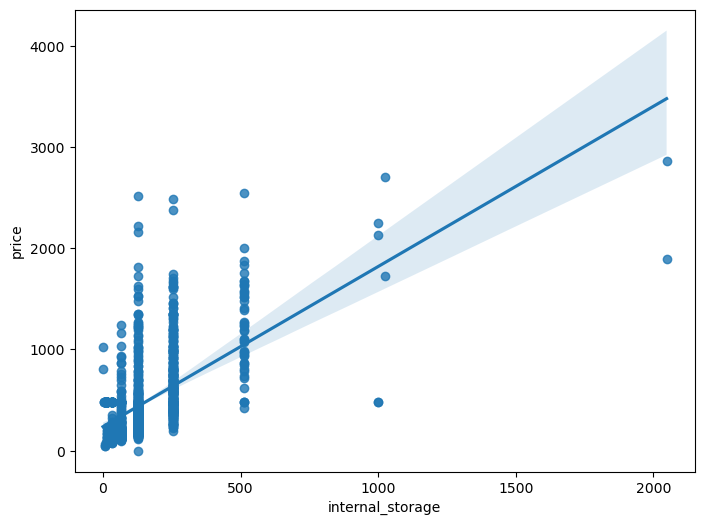

In [71]:
plt.figure(figsize=(8, 6))
sns.regplot(x='internal_storage', y='price', data = df_num)
plt.show()

In [72]:
# p-value

In [73]:
from scipy.stats import pearsonr

# Berechnung den Pearson-Korrelationskoeffizienten und den p-Wert
corr, p_value = pearsonr(df_num['internal_storage'], df_num['price'])

print("Pearson-Korrelationskoeffizient:", corr)
print("p-Wert:", p_value)


Pearson-Korrelationskoeffizient: 0.5833013995817282
p-Wert: 1.7419821108945546e-113


p-wert ist sehr klein (< 0,05) was darauf hindeutet dass die Korrelation zwischen internal_storage und price nicht durch zufall sondern statistisch signifikant ist

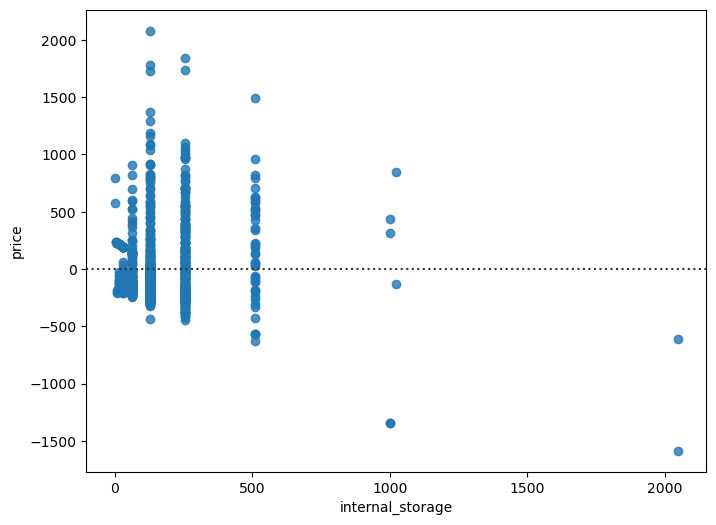

In [74]:
# Residualplot 
plt.figure(figsize=(8, 6))
sns.residplot(x='internal_storage', y=df['price'], data = df_num)
plt.show()

Anscheinend ein simple Linear Regression kann den Preis des Smartphone anhand  der Internspeicher nicht vorhersagen und nicht lineare Funktion wird eher anpassen. da die rediduals sich nicht um den 0 achse verteilen

## Richtige Model aussuchen und Leistung verleichen

### 1. Simple Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

x1 = df_num[['battery_capacity_mAh']]
x2 = df_num[['disp_size_inch']]
y = df_num['price']

In [76]:
# Model initialisierung
lr1 = LinearRegression()
# Model anpassen
lr1.fit(x1,y)

LinearRegression()

In [77]:
# r-squared-error
lr1.score(x1,y)

0.0025066345341896445

In [78]:
lr2 = LinearRegression()
lr2.fit(x2,y)

LinearRegression()

In [79]:
# r-aquared
lr2.score(x2,y)

0.07637619346306601

### 2. Multiple Linear Regression

##### I. Nehmen wir zwei Eigenschaften Akkukapazität und Bildschirmgröße

In [80]:
X = df_num[['battery_capacity_mAh', 'disp_size_inch']]
y = df_num['price']

In [81]:
lr_mult_2 = LinearRegression()
lr_mult_2.fit(X,y)

LinearRegression()

In [82]:
# r-squared
lr_mult_2.score(X,y)

0.21013781746140314

Auch wenn wir das Modell auf alle verfügbaren Daten trainiert haben, scheint es immer noch nicht besonders gut zu funktionieren.

##### II. Nun betrachten wir alle unabhängige Variable

In [83]:
X = df_num.drop('price', axis =1)
y = df_num['price']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [85]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [86]:
# r-squared
mlr.score(X_test, y_test)

0.4655227466055807

Das Modell erklärt einen geringen Teil der Variabilität der Daten. Eher mäßig.

#### Visual Überprüfung

<div style="background-color :#FFFF00">
Die Wahrscheinlichkeitsdichtefunktion (PDF) gibt die Wahrscheinlichkeitsdichte an, dass eine Zufallsvariable einen bestimmten Wert annimmt.

$$ \hat{f}(y) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{y - y_i}{h}\right)$$

- $\hat{f}(y)$: ist die geschätzte Dichtefunktion bei $y$
- $n$: ist die Anzahl der $y$-values
- $h$: ist die Bandbreite (bandwidth), die die Breite der Gaußschen Kerne bestimmt. in kde-plot von seaborn ist 'bw_adjust' nimmt 1 als Default Value
- $y_i$: sind die Werte von $y$. in unserem Fall die Preise
- $K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}u^2}$: ist die Kernfunktion
</div>

In [87]:
y_test_pred = mlr.predict(X_test)
#y_pred[0:5]

In [88]:
import warnings
# Deaktiviere die FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Dichte der tatsächlichen und vorhergesagten Preise vergleichen:

[]

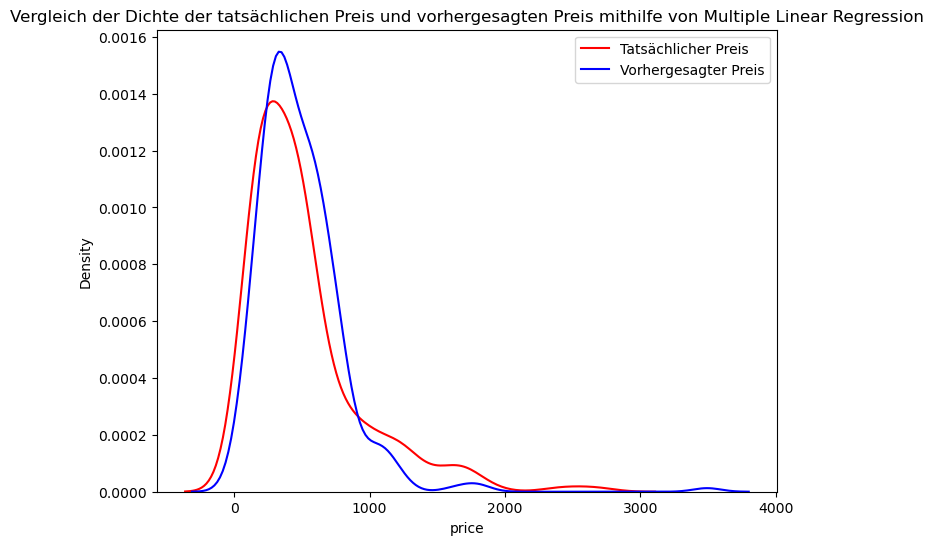

In [89]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, color ='r', label ='Tatsächlicher Preis')
sns.kdeplot(y_test_pred, color ='b', label ='Vorhergesagter Preis')
plt.title("Vergleich der Dichte der tatsächlichen Preis und vorhergesagten Preis mithilfe von Multiple Linear Regression")
plt.legend()
plt.plot()

Wir können erkennen, dass die angepassten Werte langsam näher an die tatsächlichen Werte herankommen, Wenn wir alle unabhängige Variable in Betracht genommen haben. Aber da ist auf jeden Fall noch Platz für Verbesserungen.

### 3. Polynomial Regression

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [93]:
pr = PolynomialFeatures(degree=1)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.transform(X_test)
    
# Polynomregression durchführen
coefficients, _, _, _ = np.linalg.lstsq(X_train_pr, y_train, rcond=None)
    
# Vorhersagen machen
y_test_pred = np.dot(X_test_pr, coefficients)

In [94]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
r2

0.5442166313088082

#### Visual überprüfen

[]

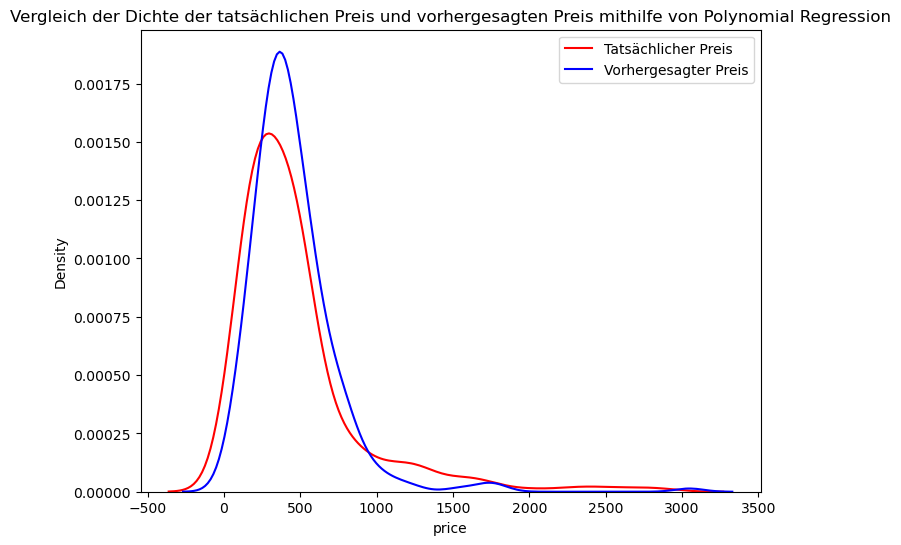

In [95]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, color ='r', label ='Tatsächlicher Preis')
sns.kdeplot(y_test_pred, color ='b', label ='Vorhergesagter Preis')
plt.title("Vergleich der Dichte der tatsächlichen Preis und vorhergesagten Preis mithilfe von Polynomial Regression")
plt.legend()
plt.plot()

Der beste Grad für die Polynomregression ist 1. Polynomialregression Graden scheint ausreichend zu unseren Daten zu passen.

### 4. XGboost Regressor

In [96]:
X = df_num.drop('price', axis =1)
y = df_num['price']

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
import xgboost as xgb 
xgb_r = xgb.XGBRegressor(
    max_depth=3,  
    n_estimators=600,  # Anzahl der Bäume im Modell
    reg_alpha=25,  # Regularisierung
)
xgb_r.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [99]:
# R-squared
xgb_r.score(X_test, y_test)

0.9394816231385039

In [100]:
y_test_pred = xgb_r.predict(X_test)

### Visual überprüfen

[]

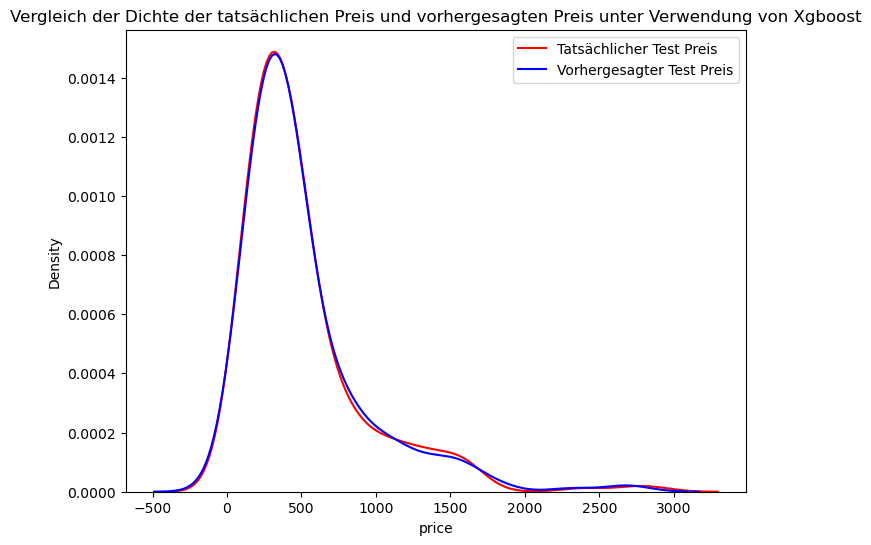

In [101]:
plt.figure(figsize=(8,6))
sns.kdeplot(y_test, color ='r', label ='Tatsächlicher Test Preis')
sns.kdeplot(y_test_pred, color ='b', label ='Vorhergesagter Test Preis')
plt.legend()
plt.title("Vergleich der Dichte der tatsächlichen Preis und vorhergesagten Preis unter Verwendung von Xgboost")
plt.plot()

Xgboost mit dieser Parametern scheint ein guter Model für unser Data zu passen. Weil die beiden Kurven sich ziemlich überklappen

Das Diagramm vermittelt uns, dass rund um die Spitze der Dichtfunktion bzw wo sich die Daten am haüfigsten auftreten zwischen 250 und 350 die vorhergesagten Preise von den tatsächlichen abweichen was darauf hindeuten kann, dass unser Model nicht so genau hier. möglicherweiße brauchen wir mehr Merkmale um den genauen Preis zwischen 250 und 350 anzunähren

In [102]:
df[(df['price']> 250) & (df['price']<350)].shape[0]

170

## Lassen wir uns ein paar beliebige Handys auswählen und unser Model Testen 

In [103]:
y_pred = xgb_r.predict(X)

"Ich werde die Indizes der Testdaten verwenden, die mein Modell nicht gelernt hat."

In [104]:
X_test.index

Index([ 677,  351, 1079,  727,  707,  242,  929, 1221,  822,  219,
       ...
        966,  750,  181,  868,  635,  673,  139,  726, 1033,  616],
      dtype='int64', length=247)

In [105]:
print(df.loc[388,:])
print('\n')
print(f'Der vorhergesgter Preis lautet: {y_pred[388]} €')

brand                                 SAMSUNG
model                   Samsung Note 8.0 32GB
process_brand                          Exynos
processor                    Exynos 4412 Quad
internal_storage                           32
ram                                       2.0
battery_capacity_mAh                   4600.0
rar_camera_total_mp                       5.0
front_camera_mp                           1.0
display                                  8.0"
disp_size_inch                            8.0
price                                  477.92
brand_num                                   3
process_brand_num                           2
processor_num                              48
Name: 388, dtype: object


Der vorhergesgter Preis lautet: 466.2547302246094 €


<div style="background-color:#e6c1ff">
    <h2>Spreicherung des Models</h2>
</div

In [106]:
with open('xgb_phone_price_model.sav','wb') as f:
    pickle.dump(xgb_r,f)

In [107]:
with open('xgb_phone_price_model.sav','rb') as f:
    price = pickle.load(f)

<div style="background-color:#e6c1ff">
    <h2>User Skript</h2>
</div

In diesem Abschnitt werde ich mein gespreichertes Model aufrufen anhand einer Funktion. Im Abschnitt **Kodierung** oben haben wir eine funktion `convert_to_numeric` erstellt die uns ermöglicht die kategorische Eingaben zu den entsprechenden Coden konvertiert. Mit anderen Worten der Benutzer sollte nur diese inputs eingeben : `brand`, `process_brand`, `processor`, `internal_storage`, `ram`, `battery_capacity_mAh`, `rar_camera_total_mp`, `front_camera_mp`, `disp_size_inch` um Vorhersage zu kriegen ohne expizit die Kategoriecoden zu erkennen

In [108]:
def price_predict(user_input):
    # Konvertiere die Benutzereingabe in numerische Werte
    user_input_con = convert_to_numeric(user_input)
    
    # Vorhersage des Preises mit dem Modell
    pred_price = price.predict([user_input_con])[0]
    
    # Runde die Vorhersage auf zwei Dezimalstellen
    pred_price_rounded = round(pred_price, 2)
    
    # Formatieren
    pred_price_formatted = '{:.2f}'.format(pred_price_rounded)
    
    # Rückgabe der Vorhersage 
    return f'Der vorhergesagte Preis: {pred_price_formatted} €'

In [109]:
user_input = ['ONEPLUS', 'Snapdragon', 'Snapdragon 855+', 64, 8.0, 3800.0, 76.0, 16.0, 6.55]

In [110]:
df_inp = df[['brand', 'process_brand','processor','internal_storage', 'ram','battery_capacity_mAh','rar_camera_total_mp','front_camera_mp','disp_size_inch'    ]]

In [111]:
price_predict(user_input)

'Der vorhergesagte Preis: 650.54 €'

In [112]:
df_inp.iloc[800]

brand                      APPLE
process_brand              Apple
processor               Apple M2
internal_storage            1024
ram                         16.0
battery_capacity_mAh      7538.0
rar_camera_total_mp         22.0
front_camera_mp             12.0
disp_size_inch              11.0
Name: 800, dtype: object

In [113]:
price_predict(df_inp.iloc[800].tolist())

'Der vorhergesagte Preis: 1504.32 €'

##### Vergleichung mit dem tatsächlichen Preis

In [114]:
df['process_brand'].unique()

array(['Exynos', 'Snapdragon', 'MediaTek', 'MT6739W', 'Dimensity',
       'Unisoc', 'MT6833', 'MT6853', 'MT6739WW', 'Spreadtrum', 'MT6737T',
       'Pega-Dual', 'MT6889Z', 'Apple', 'MT6765V', 'MT6873V'],
      dtype=object)

In [115]:
df.loc[34,'price']

135.13

<div style="background-color:#e6c1ff">
    <h2>Kategorien speichern</h2>
</div

In diesem Abschnitt möchte alle einzigartige Werte der Kategorien abspreichen.

In [116]:
brand = df['brand'].unique()
brand_df = pd.DataFrame(brand, columns=['brand'])

process_brand = df['process_brand'].unique()
proces_brand_df = pd.DataFrame(process_brand, columns=['process_brand'])

processor = df['processor'].unique()
processor_df = pd.DataFrame(processor, columns=['processor'])

# Merging the DataFrames
choice = pd.merge(brand_df, proces_brand_df, left_index=True, right_index=True, how='right')
choice = pd.merge(choice, processor_df, left_index=True, right_index=True, how='right')

In [138]:
sorted(processor_df['processor'].unique())

['Apple A10 Fusion',
 'Apple A11 Bionic',
 'Apple A12 Bionic',
 'Apple A12X Bionic',
 'Apple A13 Bionic',
 'Apple A14',
 'Apple A14 Bionic',
 'Apple A15 Bionic',
 'Apple A16 Bionic',
 'Apple A4',
 'Apple A5',
 'Apple A6',
 'Apple A7',
 'Apple A8',
 'Apple A9',
 'Apple Bionic',
 'Apple M1',
 'Apple M2',
 'Dimensity',
 'Dimensity 1000+',
 'Dimensity 1080',
 'Dimensity 1100 5G',
 'Dimensity 1200 5G',
 'Dimensity 1200 Max 5G',
 'Dimensity 1200-Max 5G',
 'Dimensity 1300 5G',
 'Dimensity 700',
 'Dimensity 700 5G',
 'Dimensity 720',
 'Dimensity 720 5G',
 'Dimensity 8000 5G',
 'Dimensity 8000 Max',
 'Dimensity 800U 5G',
 'Dimensity 810',
 'Dimensity 810 5G',
 'Dimensity 8100',
 'Dimensity 8100 5G',
 'Dimensity 8100 Max 5G',
 'Dimensity 8100-Max',
 'Dimensity 900 5G',
 'Dimensity 9000 5G',
 'Dimensity 920 5G',
 'Exynos',
 'Exynos 1200',
 'Exynos 2100',
 'Exynos 2200',
 'Exynos 3470 Quad',
 'Exynos 3475 Quad',
 'Exynos 4412 Quad',
 'Exynos 5410 Octa',
 'Exynos 7420 Octa',
 'Exynos 7570 Quad',
 '

In [118]:
processor_df.to_csv('prozessoren.csv', index=False)

In [119]:
# choice = choice.fillna('')

In [120]:
# choice.to_csv('choice.csv', index=False)

In [121]:
df.to_csv('mobiletelefone.csv', index=False)

#### Autor: Solaiman Karroumi